<a href="https://colab.research.google.com/github/damodhar92/Guvi-Tasks/blob/main/Task_7Assignment16%20Random%20Forest%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split      
from sklearn.ensemble import RandomForestClassifier

**Importing the dataset**

In [2]:
df=pd.read_csv('/content/Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [9]:
df.shape

(400, 5)

**Splitting the dataset into the Training set and Test set**

In [10]:
x=df[["Age", "EstimatedSalary"]]
y=df["Purchased"]
x_train,  x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=5)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(300, 2) (100, 2) (300,) (100,)


**Feature Scaling**

In [11]:
from sklearn.preprocessing import StandardScaler
func = StandardScaler()
func.fit(x_train)
x_train_std = func.transform(x_train)
x_test_std = func.transform(x_test)

**Fitting Random Forest to the Training set**

In [12]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(x_train_std, y_train)

RandomForestClassifier(random_state=0)

**Predicting the Test set results**

In [13]:
y_pred = rfc.predict(x_test_std)

**Making the Confusion Matrix**

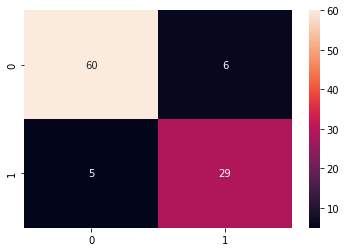

In [14]:
from sklearn.metrics import confusion_matrix
cmatrix = confusion_matrix(y_test, y_pred) 
   
sns.heatmap(cmatrix, annot=True)  


In [15]:

accuracy_score(y_test,y_pred)

0.89

**Visualising the Training set results**

Text(0.5, 0, 'Purchased')

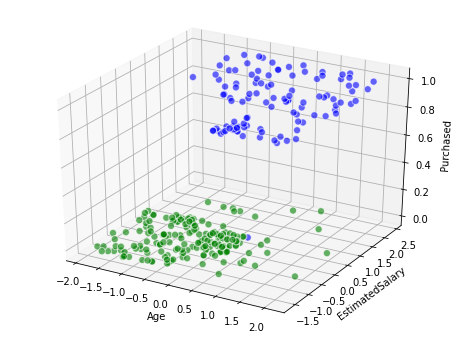

In [18]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = x_train_std[:,0]
ys = x_train_std[:,1]
zs = y_train
ax.scatter(xs, ys, zs, s=50,color=['blue' if p==1 else 'green' for p in rfc.predict(x_train_std)], alpha=0.6, edgecolors='w')

ax.set_xlabel('Age')
ax.set_ylabel('EstimatedSalary')
ax.set_zlabel('Purchased')

**Visualising the Test set results**

Text(0.5, 0, 'Purchased')

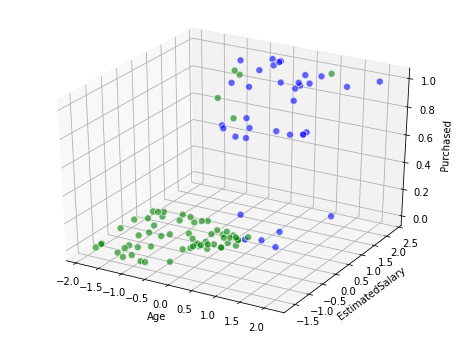

In [16]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = x_test_std[:,0]
ys = x_test_std[:,1]
zs = y_test
ax.scatter(xs, ys, zs, s=50,color=['blue' if p==1 else 'green' for p in y_pred], alpha=0.6, edgecolors='w')

ax.set_xlabel('Age')
ax.set_ylabel('EstimatedSalary')
ax.set_zlabel('Purchased')